1.  Load the dataset

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


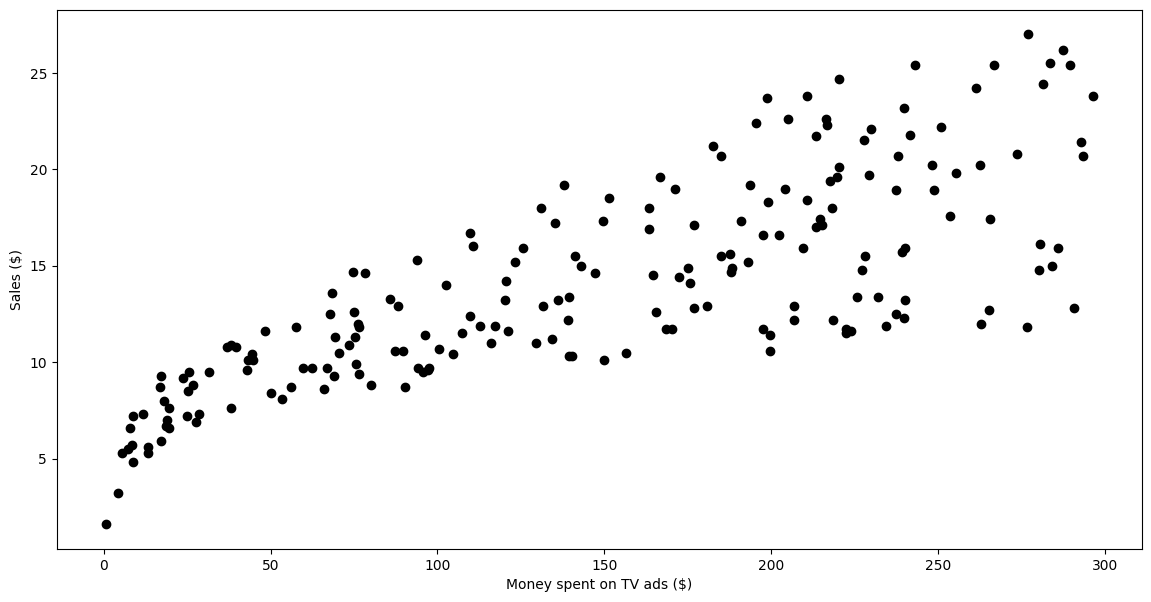

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Replace 'url' with the actual URL of your dataset
url = r'Advertising.csv'
data = pd.read_csv(url)

print(data.head())

# plot data
plt.figure(figsize=(14, 7))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

2. Split the data into training and testing sets with 80% of data points for training and 20% of data points for testing.

In [78]:
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Train a model

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients (w1, w2, w3):", coefficients)
print("Intercept (w0):", intercept)

Coefficients (w1, w2, w3): [0.04472952 0.18919505 0.00276111]
Intercept (w0): 2.9790673381226256


4. Calculate statistics 

In [81]:
from scipy import stats

# Step 4: Evaluate the model on testing data
y_pred_test = model.predict(X_test)

# Calculate RSS (Residual Sum of Squares)
RSS_test = np.sum((y_test - y_pred_test) ** 2)

# Calculate RSE (Residual Standard Error)
N = len(y_test)
d = X_test.shape[1]
RSE_test = np.sqrt(RSS_test / (N - d))

# Calculate MSE (Mean Squared Error)
MSE_test = mean_squared_error(y_test, y_pred_test)

# Calculate R2 statistic
R2_test = 1-RSS_test/np.sum((y_test - np.mean(y_test)) ** 2)

# Standard error of test coefficients
SE_TV_test = RSE_test/np.sqrt(np.sum((X_test['TV'] - np.mean(X_test['TV'])) ** 2))
SE_radio_test = RSE_test/np.sqrt(np.sum((X_test['radio'] - np.mean(X_test['radio'])) ** 2))
SE_newspaper_test = RSE_test/np.sqrt(np.sum((X_test['newspaper'] - np.mean(X_test['newspaper'])) ** 2))

# t-statistic and p-value for each feature
t_TV_test = (model.coef_[0])/SE_TV_test
t_radio_test = (model.coef_[1])/SE_radio_test
t_newspaper_test = (model.coef_[2])/SE_newspaper_test


p_TV_test = stats.t.sf(np.abs(t_TV_test), N-2)*2
p_radio_test = stats.t.sf(np.abs(t_radio_test), N-2)*2
p_newspaper_test = stats.t.sf(np.abs(t_newspaper_test), N-2)*2


# Print the results
print("Stastics for testing data:")
print(f"RSS: {RSS_test}")
print(f"RSE: {RSE_test}")
print(f"MSE: {MSE_test}")
print(f"R^2: {R2_test}")
print()

print("Std. Error for each feature:")
print('TV       : ',SE_TV_test)
print('radio    : ',SE_radio_test)
print('newspaper: ',SE_newspaper_test)
print("t-statistic for each feature:")
print('TV       : ',t_TV_test)
print('radio    : ',t_radio_test)
print('newspaper: ',t_newspaper_test)
print("p-value for each feature:")
print('TV       : ',p_TV_test)
print('radio    : ',p_radio_test)
print('newspaper: ',p_newspaper_test)

# Evaluate the model on training data
y_pred_train = model.predict(X_train)

# Calculate RSS (Residual Sum of Squares)
RSS_train = np.sum((y_train - y_pred_train) ** 2)

# Calculate RSE (Residual Standard Error)
N = len(y_train)
d = X_train.shape[1]
RSE_train = np.sqrt(RSS_train / (N - d))

# Calculate MSE (Mean Squared Error)
MSE_train = mean_squared_error(y_train, y_pred_train)

# Calculate R2 statistic
R2_train = r2_score(y_train, y_pred_train)

# Standard error of train coefficients
SE_TV_train = RSE_train/np.sqrt(np.sum((X_train['TV'] - np.mean(X_train['TV'])) ** 2))
SE_radio_train = RSE_train/np.sqrt(np.sum((X_train['radio'] - np.mean(X_train['radio'])) ** 2))
SE_newspaper_train = RSE_train/np.sqrt(np.sum((X_train['newspaper'] - np.mean(X_train['newspaper'])) ** 2))

# t-statistic and p-value for each feature
t_TV_train = (model.coef_[0])/SE_TV_train
t_radio_train = (model.coef_[1])/SE_radio_train
t_newspaper_train = (model.coef_[2])/SE_newspaper_train

p_TV_train = stats.t.sf(np.abs(t_TV_train), N-2)*2
p_radio_train = stats.t.sf(np.abs(t_radio_train), N-2)*2
p_newspaper_train = stats.t.sf(np.abs(t_newspaper_train), N-2)*2


# Print the results
print()
print("Stastics for training data:")
print(f"RSS: {RSS_train}")
print(f"RSE: {RSE_train}")
print(f"MSE: {MSE_train}")
print(f"R^2: {R2_train}")
print()

print("Std. Error for each feature:")
print('TV       : ',SE_TV_train)
print('radio    : ',SE_radio_train)
print('newspaper: ',SE_newspaper_train)

print("t-statistic for each feature:")
print('TV       : ',t_TV_train)
print('radio    : ',t_radio_train)
print('newspaper: ',t_newspaper_train)

print("p-value for each feature:")
print('TV       : ',p_TV_train)
print('radio    : ',p_radio_train)
print('newspaper: ',p_newspaper_train)





Stastics for testing data:
RSS: 126.96389415904417
RSE: 1.8524191207426806
MSE: 3.174097353976104
R^2: 0.899438024100912

Std. Error for each feature:
TV       :  0.0032413433750177988
radio    :  0.0196438403742906
newspaper:  0.011004988002276353
t-statistic for each feature:
TV       :  13.799684974280366
radio    :  9.631266118512684
newspaper:  0.2508966244030504
p-value for each feature:
TV       :  2.2186557990034996e-16
radio    :  9.598125207694734e-12
newspaper:  0.8032457656245205

Stastics for training data:
RSS: 432.82070769302624
RSE: 1.660367367248314
MSE: 2.705129423081414
R^2: 0.8957008271017817

Std. Error for each feature:
TV       :  0.0015597901085700973
radio    :  0.008893871829610971
newspaper:  0.00647486168883072
t-statistic for each feature:
TV       :  28.67662592739552
radio    :  21.27251863518841
newspaper:  0.4264360343218125
p-value for each feature:
TV       :  1.6383428843357603e-64
radio    :  3.087650079938613e-48
newspaper:  0.6703705771810318


7.

In [89]:
# Scenario 1
scenario_1 = np.array([[25000, 25000, 0]])  # TV budget, Radio budget, Newspaper budget
sales_scenario_1 = model.predict(scenario_1)

# Scenario 2
scenario_2 = np.array([[50000,0, 0]])  # TV budget, Radio budget, Newspaper budget
sales_scenario_2 = model.predict(scenario_2)

# Scenario 2
scenario_3 = np.array([[0,50000, 0]])  # TV budget, Radio budget, Newspaper budget
sales_scenario_3 = model.predict(scenario_3)

print("Predicted Sales for allocating 25 000 for both TV & Radio :", sales_scenario_1[0])
print("Predicted Sales for allocating 50 000 for TV              :", sales_scenario_2[0])
print("Predicted Sales for allocating 50 000 for Radio           :", sales_scenario_3[0])

Predicted Sales for allocating 25 000 for both TV & Radio : 5851.093359915446
Predicted Sales for allocating 50 000 for TV              : 2239.4549407739387
Predicted Sales for allocating 50 000 for Radio           : 9462.731779056954


c:\Python311\cv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\cv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\cv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
